In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Input, Dropout, MaxPool2D
from zipfile import ZipFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from google.colab import drive


from tensorflow.keras.regularizers import l2

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
drive.mount('/content/gdrive')


#Uncomment to extract the files
# extract_location = '/content/drive/MyDrive/Colab Notebooks/melanoma/'
# zip_file = '/content/drive/MyDrive/Colab Notebooks/melanoma/CNN_assignment.zip'
# with ZipFile(zip_file, 'r') as zObject:
#   zObject.extractall(
#         path=extract_location)

Mounted at /content/gdrive


In [3]:
train_path = '/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [11]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset
Define some parameters for the loader:

In [12]:
batch_size = 32
img_height = 180
img_width = 180

In [13]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(data_dir_train, image_size=(img_height, img_width), batch_size=batch_size, seed=123, subset='training', validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [14]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(data_dir_train, image_size=(img_height, img_width), batch_size=batch_size, seed=123, subset='validation', validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [15]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

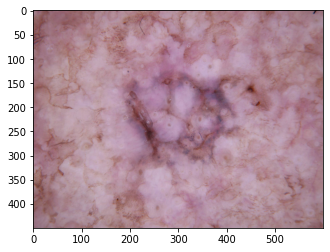

actinic keratosis


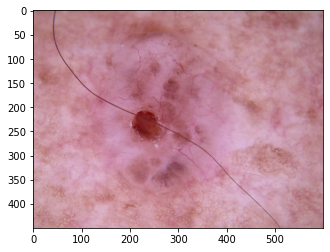

basal cell carcinoma


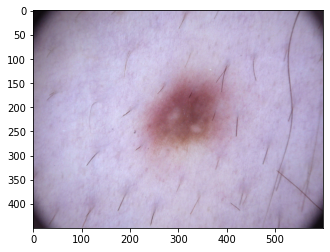

dermatofibroma


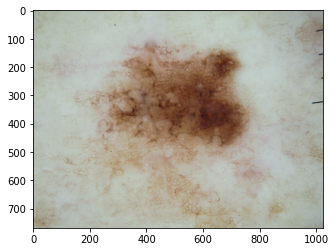

melanoma


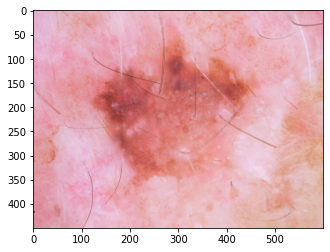

nevus


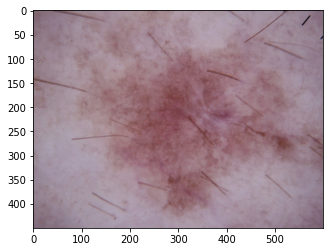

pigmented benign keratosis


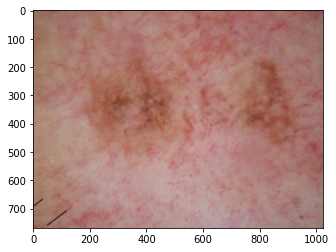

seborrheic keratosis


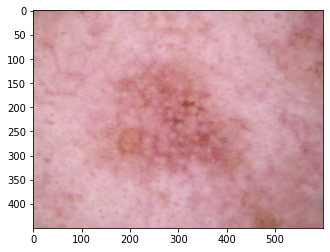

squamous cell carcinoma


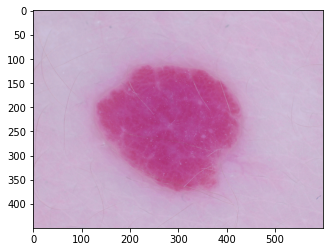

vascular lesion


In [ ]:
import matplotlib.pyplot as plt

for i in class_names:
  path_to_img = train_path+'/'+i
  image_files = glob(path_to_img + '/*.jpg')
  plt.imshow(image.load_img(np.random.choice(image_files)))
  plt.show()
  print(i)

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [46]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    x = layers.Rescaling(1.0 / 255)(inputs)
    
    x = layers.BatchNormalization()(x)
    
    x = layers.Conv2D(32, 3)(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(32, 3)(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)

    x = layers.Conv2D(64, 3)(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(64, 3)(x)
    x = layers.Activation("relu")(x)


    x = layers.Flatten()(x)

    x = layers.Dense(128)(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Dense(num_classes)(x)
    x = layers.Activation('softmax')(x)

    return keras.Model(inputs, x)

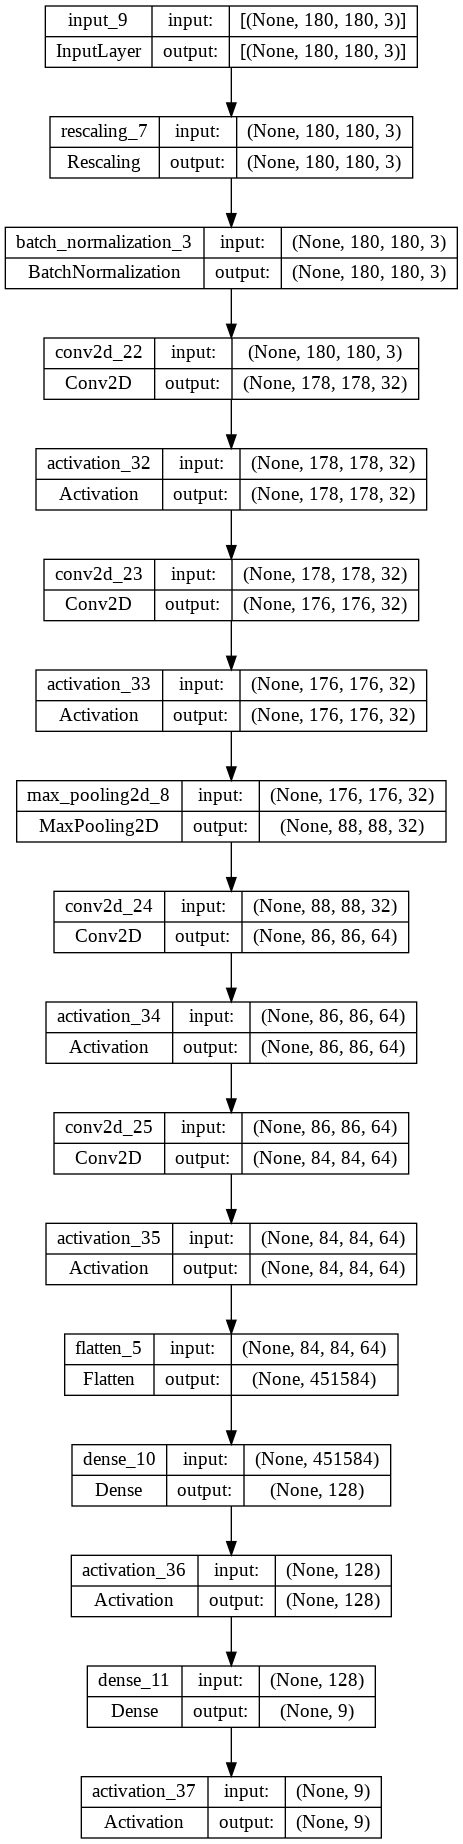

In [ ]:
image_size = (img_height, img_width, 3)

model = make_model(input_shape=image_size, num_classes=9)
keras.utils.plot_model(model, show_shapes=True)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization_3 (Batc  (None, 180, 180, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_22 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 activation_32 (Activation)  (None, 178, 178, 32)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 176, 176, 32)      9248      
                                                           

### Train the model

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  # callbacks=callbacks,
)

Epoch 1/20
56/56 [==============================] - 19s 137ms/step - loss: 1.9223 - accuracy: 0.2812 - val_loss: 2.1248 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 5s 83ms/step - loss: 1.6854 - accuracy: 0.3968 - val_loss: 1.9971 - val_accuracy: 0.1969
Epoch 3/20
56/56 [==============================] - 5s 83ms/step - loss: 1.4798 - accuracy: 0.4805 - val_loss: 2.1129 - val_accuracy: 0.2483
Epoch 4/20
56/56 [==============================] - 5s 85ms/step - loss: 1.3973 - accuracy: 0.5145 - val_loss: 1.9783 - val_accuracy: 0.2170
Epoch 5/20
56/56 [==============================] - 5s 84ms/step - loss: 1.2908 - accuracy: 0.5352 - val_loss: 1.6716 - val_accuracy: 0.4206
Epoch 6/20
56/56 [==============================] - 5s 84ms/step - loss: 1.2229 - accuracy: 0.5714 - val_loss: 1.4198 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 5s 85ms/step - loss: 1.1775 - accuracy: 0.5871 - val_loss: 1.3913 - val_accuracy: 0.4989
Epoch 8/20


### Visualizing training results

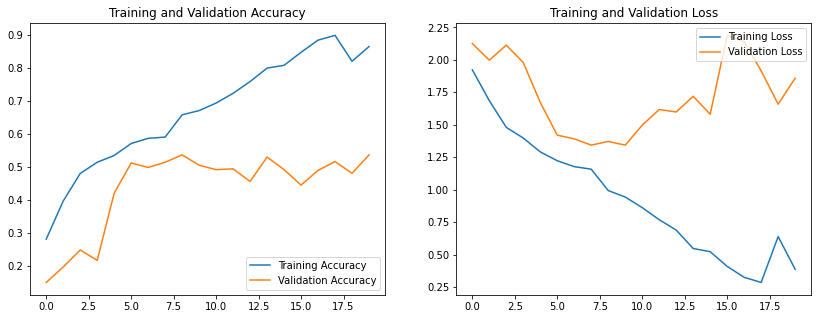

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
The model is highly overfitting. So we need to apply image agumentaion over here.

### Augumentation

In [26]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])

IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

##### Create the model, compile and train the model

In [ ]:
def make_model(input_shape, num_classes):
  model = Sequential([
      keras.Input(shape=input_shape),
      resize_and_rescale,
      data_augmentation,
      layers.BatchNormalization(),
      layers.Conv2D(32, 3, activation='relu'),
      layers.Conv2D(32, 3, activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),

      layers.Conv2D(64, 3, activation='relu'),
      layers.Conv2D(64, 3, activation='relu'),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(9, activation='softmax')
      
      ])

  return model

##### Compile

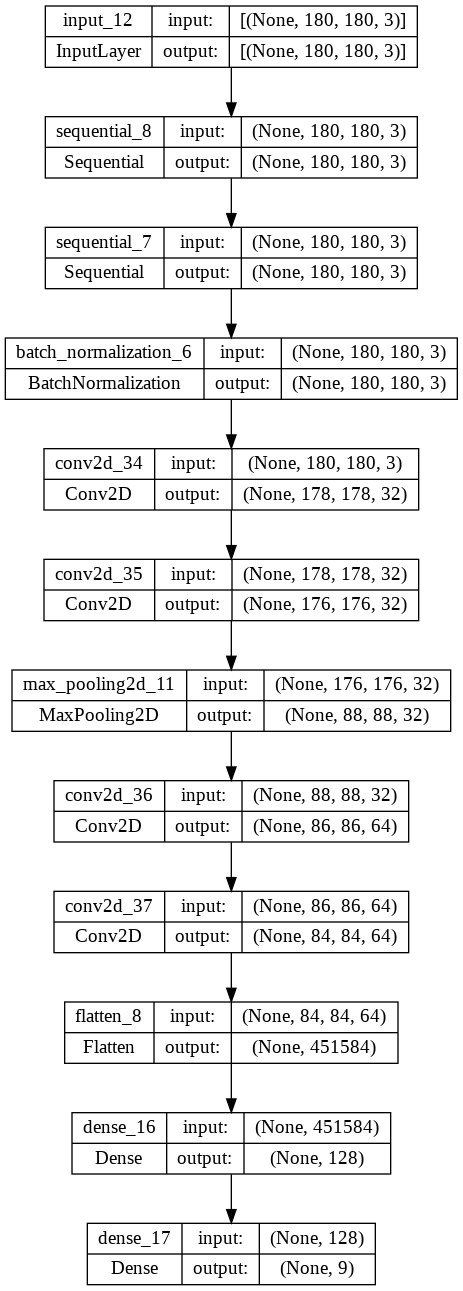

In [ ]:
image_size = (img_height, img_width, 3)

model = make_model(input_shape=image_size, num_classes=9)

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

##### Fit

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  # callbacks=callbacks,
)

Epoch 1/20
56/56 [==============================] - 7s 107ms/step - loss: 1.7963 - accuracy: 0.3594 - val_loss: 1.9955 - val_accuracy: 0.2215
Epoch 2/20
56/56 [==============================] - 6s 104ms/step - loss: 1.5676 - accuracy: 0.4397 - val_loss: 2.1851 - val_accuracy: 0.1521
Epoch 3/20
56/56 [==============================] - 6s 104ms/step - loss: 1.4370 - accuracy: 0.4972 - val_loss: 2.2192 - val_accuracy: 0.1633
Epoch 4/20
56/56 [==============================] - 6s 105ms/step - loss: 1.4003 - accuracy: 0.5050 - val_loss: 1.8601 - val_accuracy: 0.3087
Epoch 5/20
56/56 [==============================] - 6s 105ms/step - loss: 1.3831 - accuracy: 0.5112 - val_loss: 1.7344 - val_accuracy: 0.3758
Epoch 6/20
56/56 [==============================] - 6s 106ms/step - loss: 1.3384 - accuracy: 0.5268 - val_loss: 1.6931 - val_accuracy: 0.3848
Epoch 7/20
56/56 [==============================] - 6s 106ms/step - loss: 1.3220 - accuracy: 0.5223 - val_loss: 1.3232 - val_accuracy: 0.5391
Epoch 

**Todo:** Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

**Todo:** Find the distribution of classes in the training dataset.

**Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

**Findings:** The model overfitting problem solved. But it seems like it is underfitted

#### Class Imbalance Check

Todo: Write your findings here:
- Which class has the least number of samples?
- Which classes dominate the data in terms proportionate number of samples?
Todo: Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [8]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Class Imbalance Check and Rectification
To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [6]:
for i in os.listdir(train_path):
  count = 0
  for path in os.listdir(train_path+'/'+i):
    # check if current path is a file
    if os.path.isfile(os.path.join(train_path+'/'+i, path)):
        count += 1
  print(i)
  print('File Count:', count)

actinic keratosis
File Count: 114
basal cell carcinoma
File Count: 376
dermatofibroma
File Count: 95
melanoma
File Count: 438
nevus
File Count: 357
pigmented benign keratosis
File Count: 462
seborrheic keratosis
File Count: 77
squamous cell carcinoma
File Count: 181
vascular lesion
File Count: 139


In [16]:
path_to_training_dataset = train_path
import Augmentor
for i in class_names:
  # print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED04D75B20>: 100%|██████████| 500/500 [00:20<00:00, 24.51 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FED04D2CE80>: 100%|██████████| 500/500 [00:20<00:00, 24.81 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FED04DD9580>: 100%|██████████| 500/500 [00:18<00:00, 26.99 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=965x724 at 0x7FED04D42B80>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED04D11370>: 100%|██████████| 500/500 [01:36<00:00,  5.18 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FED04CA4370>: 100%|██████████| 500/500 [00:20<00:00, 24.97 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FED04DBD9D0>: 100%|██████████| 500/500 [00:42<00:00, 11.78 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FED04D47190>: 100%|██████████| 500/500 [00:19<00:00, 26.32 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FED04E5BA30>: 100%|██████████| 500/500 [00:19<00:00, 25.37 Samples/s]


##### Check

In [17]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [18]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [19]:
# Lets see the distribution of augmented data after adding new images to the original training data.
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027615.jpg_cc74d8e3-fa6a-4d8c-a3b5-6d80707f04d8.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028314.jpg_70c03c0f-fcc4-420e-b32b-626e3d81eb09.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_e8c874ed-ccdb-466d-ac4a-67c56609bc1b.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027668.jpg_0b08cac9-1ef0-45a7-a7d2-ceb1ddc1a875.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The Inte

In [20]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

x = pd.DataFrame({'labels':lesion_list_new})
x.labels.value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: labels, dtype: int64

##### Todo: Train the model on the data created using Augmentor

In [21]:
batch_size = 32
img_height = 180
img_width = 180

##### Todo: Create a training dataset

In [22]:
data_dir_train = train_path
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


##### Todo: Create a validation dataset

In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


##### Todo: Create your model (make sure to include normalization)

In [39]:
def make_model(input_shape, num_classes):
  model = Sequential([
      keras.Input(shape=input_shape),
      resize_and_rescale,
      data_augmentation,
      layers.BatchNormalization(),
      layers.Conv2D(32, 3, activation='relu'),
      layers.Conv2D(32, 3, activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Dropout(0.25),

      layers.Conv2D(64, 3, activation='relu'),
      layers.Conv2D(64, 3, activation='relu'),
      layers.Dropout(0.25),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(512, activation='relu'),
      layers.Dropout(0.25),

      layers.Dense(9, activation='softmax')
      
      ])

  return model

##### Todo: Compile your model (Choose optimizer and loss function appropriately)

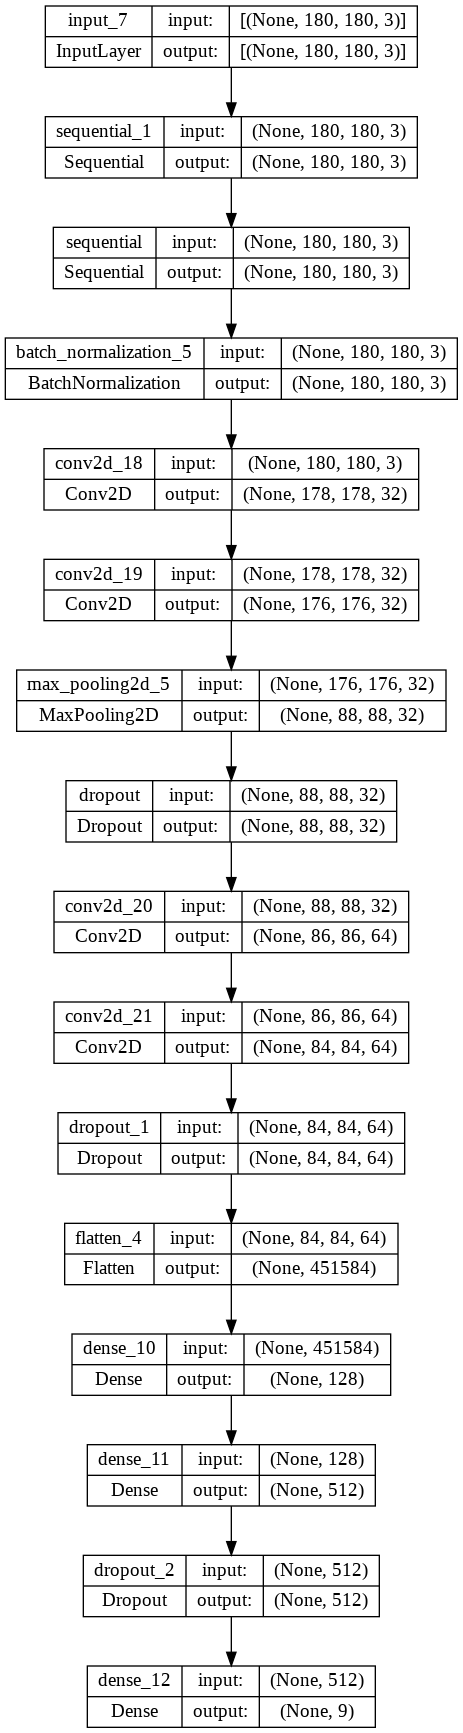

In [40]:
image_size = (img_height, img_width, 3)

model = make_model(input_shape=image_size, num_classes=9)


model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

##### Todo: Train your model

In [41]:
callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  # callbacks=callbacks,
)

Epoch 1/30
169/169 [==============================] - 43s 243ms/step - loss: 1.8956 - accuracy: 0.2895 - val_loss: 1.8829 - val_accuracy: 0.2791
Epoch 2/30
169/169 [==============================] - 43s 235ms/step - loss: 1.5940 - accuracy: 0.3958 - val_loss: 1.9268 - val_accuracy: 0.2843
Epoch 3/30
169/169 [==============================] - 41s 235ms/step - loss: 1.5064 - accuracy: 0.4379 - val_loss: 1.3928 - val_accuracy: 0.4707
Epoch 4/30
169/169 [==============================] - 41s 234ms/step - loss: 1.4556 - accuracy: 0.4483 - val_loss: 1.3495 - val_accuracy: 0.4967
Epoch 5/30
169/169 [==============================] - 40s 228ms/step - loss: 1.4057 - accuracy: 0.4696 - val_loss: 1.3388 - val_accuracy: 0.4774
Epoch 6/30
169/169 [==============================] - 40s 230ms/step - loss: 1.3738 - accuracy: 0.4763 - val_loss: 1.2951 - val_accuracy: 0.4907
Epoch 7/30
169/169 [==============================] - 40s 232ms/step - loss: 1.3118 - accuracy: 0.4994 - val_loss: 1.1906 - val_ac

##### Visualize

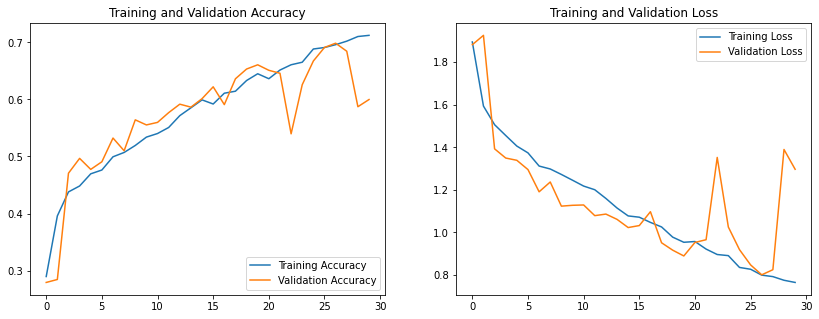

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Conclusion
After running for 30 epochs overfitting problem fixed a bit. But it is not fully trainied, so we have to fit the model with few more number of epochs to get good accuracy

##### Train for more 30 epochs

In [43]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  # callbacks=callbacks,
)

Epoch 1/30
169/169 [==============================] - 41s 233ms/step - loss: 0.7457 - accuracy: 0.7159 - val_loss: 0.8512 - val_accuracy: 0.7216
Epoch 2/30
169/169 [==============================] - 42s 244ms/step - loss: 0.7200 - accuracy: 0.7300 - val_loss: 0.7230 - val_accuracy: 0.7372
Epoch 3/30
169/169 [==============================] - 45s 262ms/step - loss: 0.7215 - accuracy: 0.7251 - val_loss: 0.7327 - val_accuracy: 0.7498
Epoch 4/30
169/169 [==============================] - 41s 233ms/step - loss: 0.6982 - accuracy: 0.7396 - val_loss: 0.6549 - val_accuracy: 0.7624
Epoch 5/30
169/169 [==============================] - 40s 233ms/step - loss: 0.6652 - accuracy: 0.7533 - val_loss: 0.8754 - val_accuracy: 0.6956
Epoch 6/30
169/169 [==============================] - 40s 228ms/step - loss: 0.6773 - accuracy: 0.7493 - val_loss: 0.7774 - val_accuracy: 0.7298
Epoch 7/30
169/169 [==============================] - 39s 227ms/step - loss: 0.6508 - accuracy: 0.7528 - val_loss: 0.7547 - val_ac

##### Visualize

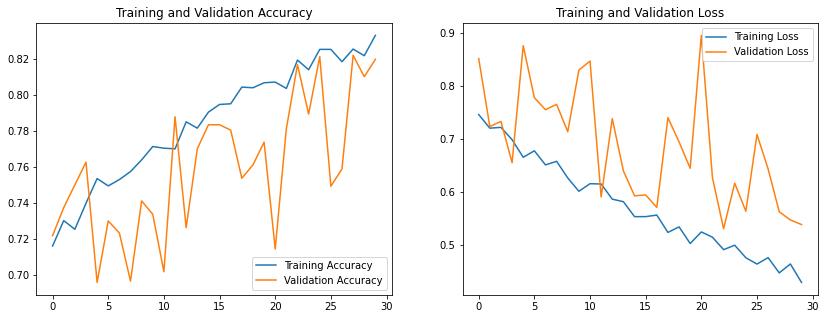

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Train for more 30 epochs

In [45]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  # callbacks=callbacks,
)

Epoch 1/30
169/169 [==============================] - 41s 230ms/step - loss: 0.4414 - accuracy: 0.8353 - val_loss: 0.6545 - val_accuracy: 0.8018
Epoch 2/30
169/169 [==============================] - 40s 229ms/step - loss: 0.4104 - accuracy: 0.8479 - val_loss: 0.5827 - val_accuracy: 0.8010
Epoch 3/30
169/169 [==============================] - 40s 229ms/step - loss: 0.4416 - accuracy: 0.8346 - val_loss: 0.5238 - val_accuracy: 0.8241
Epoch 4/30
169/169 [==============================] - 40s 227ms/step - loss: 0.4018 - accuracy: 0.8468 - val_loss: 0.5962 - val_accuracy: 0.8166
Epoch 5/30
169/169 [==============================] - 40s 228ms/step - loss: 0.4081 - accuracy: 0.8453 - val_loss: 0.6437 - val_accuracy: 0.7803
Epoch 6/30
169/169 [==============================] - 43s 248ms/step - loss: 0.4108 - accuracy: 0.8424 - val_loss: 0.5570 - val_accuracy: 0.8092
Epoch 7/30
169/169 [==============================] - 39s 227ms/step - loss: 0.3967 - accuracy: 0.8529 - val_loss: 0.7321 - val_ac

##### Visualize

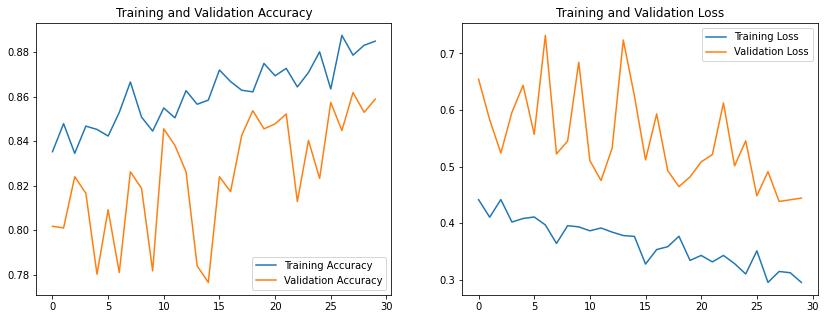

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Save Model

In [47]:
model_path = '/content/gdrive/MyDrive/Colab Notebooks/melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/saved_models'
model.save(model_path)

Todo: Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?


**Ans: Class rebalance solved the overfitting problem and we got good training and validation accuracy when fitted on 90 epochs.**